In [1]:
import time

import pandas as pd # used to load the data
import numpy as np # optimized numerical library

from sklearn import preprocessing, metrics, utils, decomposition, model_selection, linear_model, discriminant_analysis, svm, tree, ensemble # library providing several ML algorithms and related utility
from imblearn import over_sampling # provides several resampling techniques to cope with unbalanced datasets (https://github.com/scikit-learn-contrib/imbalanced-learn) compatible with sklearn

from collections import Counter

import matplotlib.pyplot as plt # used for plotting

# Start by defining three helper functions:
# - one to plot the sample distribution  acorss the class labels (to see how un-/balanced the dataset is)
# - one to compute and plot the confusion matrix
# - one to plot data in 2D with different colors per class label

def plot_pie(y, labels, title=""):
    target_stats = Counter(y)
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    fig, ax = plt.subplots()
    ax.set_title(title + " (size: %d)" % len(y))
    ax.pie(sizes, explode=explode, labels=target_stats.keys(), shadow=True, autopct='%1.1f%%')
    ax.axis('equal')


def compute_and_plot_cm(ytest, ypred, labels, title=""):
    global nfigure
    # Compute confusion matrix
    cm = metrics.confusion_matrix(ytest, ypred)
    
    accuracy = metrics.accuracy_score(ytest, ypred, normalize=True)

    # Normalize the matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    # Plot the confusion matrix

    nfigure = nfigure + 1
    plt.figure(nfigure) # new numbered figure
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues) # plot the confusionmatrix using blue shaded colors
    plt.title("Confusion Matrix Normalized (%s) Accuracy: %.1f%%" % (title, accuracy*100)) # add title
    plt.colorbar() # plot the color bar as legend

    # Plot the x and y ticks using the class label names
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)


def plot_2d(xpred, ypred, labels, title=""):
    global nfigure
    # define the colors to use for each class label
    colors = ['red', 'blue', 'green', 'yellow', 'black']
    len_colors = len(colors)
    if len_colors < len(labels):
        print("WARNING: we have less colors than classes: some classes will reuse the same color")

    nfigure = nfigure + 1
    plt.figure(nfigure) # new numbered figure
    plt.title("Feature Space (%s)" % title) # add title


    # plot each class label with a separate color 
    for c in range(len(labels)):
        cur_class = (ypred == c) # get all points belonging to class c
        plt.plot(xpred[cur_class, 0], xpred[cur_class, 1], 'o', color=colors[c % len_colors]) # plot class c


nfigure = 0 #used to number the figures

C:\WinPython\python-3.7.0b3.amd64\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


# 1. Loading and visualizing the data

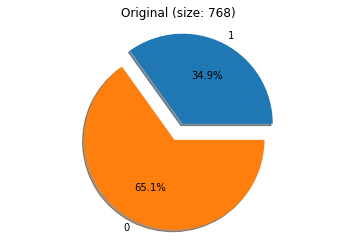

In [2]:
################ Load data ####################
# Get the dataset loaded and define class labels 
data = pd.read_csv('data/diabetes.csv', header=0)
data_class_labels = ["no diabetes", "diabetes"]

# All data columns except last are input features (X), last column is output label (y)
n_features = len(data.columns) - 1

X = data.iloc[:,0:n_features]
y = data.iloc[:,n_features]

plot_pie(y, data_class_labels, "Original")

# 2. Preparing the data set
## Split the data into traning and testing: model_selection.train_test_split()

In [3]:
################ Split data ####################
# Split data in training and testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

## Find the range of X_train
Do you see any problem? 
What function  to use to find the max and min values for each feature? 

In [4]:
X_train.max()

f1     17.00
f2    199.00
f3    122.00
f4     63.00
f5    846.00
f6     67.10
f7      2.42
f8     81.00
dtype: float64

In [5]:
X_train.min()

f1     0.000
f2     0.000
f3     0.000
f4     0.000
f5     0.000
f6     0.000
f7     0.078
f8    21.000
dtype: float64

### Standardizing the  data range: preprocessing.StandardScaler().fit()

In [6]:
################ Scale data ####################
# Train a scaler to standardize the features (zero mean and unit variance)
scaler = preprocessing.StandardScaler().fit(X_train)

# ... and scale the features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Finding the two principle components: decomposition.PCA(n_components=n).fit()

In [7]:
################ PCA ####################
# Train a PCA with 2 dimensions
pca = decomposition.PCA(n_components=2).fit(X_train_scaled)

# ... and apply it to the features
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

# 3. Logistic Regression:  linear_model.LogisticRegression().fit()
### Original feature: fit, predict, accuracy, confusion metrics

Acuracy of LR : 74.4%
[[0.80952381 0.19047619]
 [0.38372093 0.61627907]]


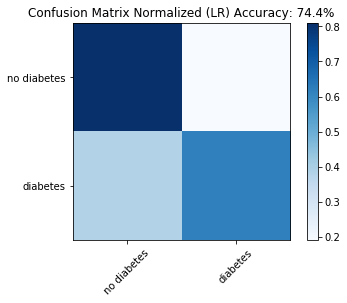

In [8]:
################ Logit ##################
# Train a Logit model on the original features
lr = linear_model.LogisticRegression().fit(X_train_scaled, y_train)

# Compute the predicted labels on test data
y_lr = lr.predict(X_test_scaled)
print("Acuracy of LR : %.1f%%" % (metrics.accuracy_score(y_test,y_lr)*100))

compute_and_plot_cm(y_test, y_lr, data_class_labels, title="LR")

### Two principle components:  fit, predict, accuracy, confusion metrics

Acuracy of LR + PCA: 70.1%
[[0.83333333 0.16666667]
 [0.55813953 0.44186047]]


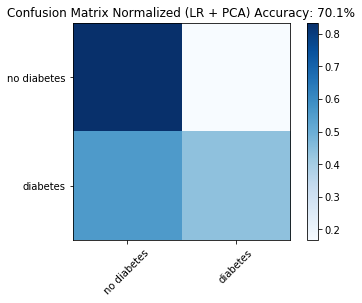

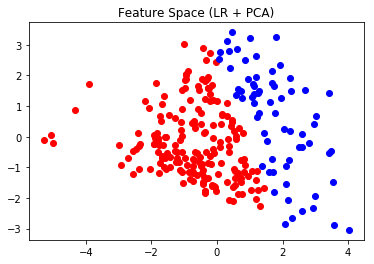

In [9]:
# Train a Logit model on pca extracted features
lr_pca = linear_model.LogisticRegression().fit(X_train_scaled_pca, y_train)

# Compute the predicted labels on test data
y_lr_pca = lr_pca.predict(X_test_scaled_pca)

print("Acuracy of LR + PCA: %.1f%%" % (metrics.accuracy_score(y_test,y_lr_pca)*100))

compute_and_plot_cm(y_test, y_lr_pca, data_class_labels, title="LR + PCA")

plot_2d(X_test_scaled_pca, y_lr_pca, data_class_labels, title="LR + PCA")

# 4. LDA: discriminant_analysis.LinearDiscriminantAnalysis().fit()
### Original feature: fit, predict, accuracy, confusion metrics

Acuracy of LDA : 74.0%
[[0.80952381 0.19047619]
 [0.39534884 0.60465116]]


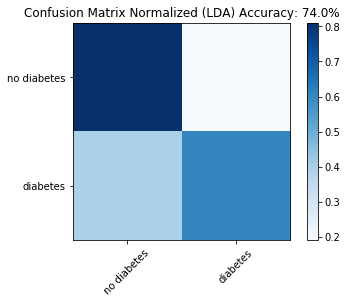

In [10]:
################ LDA ##################
# Train an LDA model on original features
lda = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train_scaled, y_train)

# Compute the predicted labels on test data
y_lda = lda.predict(X_test_scaled)

print("Acuracy of LDA : %.1f%%" % (metrics.accuracy_score(y_test,y_lda)*100))

compute_and_plot_cm(y_test, y_lda, data_class_labels, title="LDA")

### Two principle components: fit, predict, accuracy, confusion metrics

Acuracy of LDA + PCA: 70.1%
[[0.83333333 0.16666667]
 [0.55813953 0.44186047]]


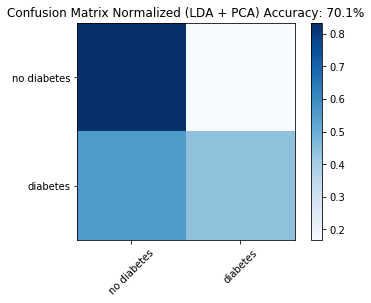

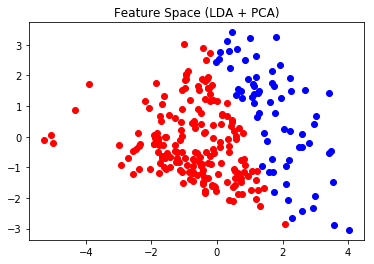

In [11]:
# Train an LDA model on pca extracted features
lda_pca = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train_scaled_pca, y_train)

# Compute the predicted labels on test data
y_lda_pca = lda_pca.predict(X_test_scaled_pca)

print("Acuracy of LDA + PCA: %.1f%%" % (metrics.accuracy_score(y_test,y_lda_pca)*100))

compute_and_plot_cm(y_test, y_lda_pca, data_class_labels, title="LDA + PCA")
# 4. QDA: discriminant_analysis.QuadraticDiscriminantAnalysis().fit()
### Original feature: fit, predict, accuracy, confusion metrics
plot_2d(X_test_scaled_pca, y_lda_pca, data_class_labels, title="LDA + PCA")

# 4. QDA: discriminant_analysis.QuadraticDiscriminantAnalysis().fit()
### Original feature: fit, predict, accuracy, confusion metrics

Acuracy of QDA : 76.4%
[[0.80952381 0.19047619]
 [0.3255814  0.6744186 ]]


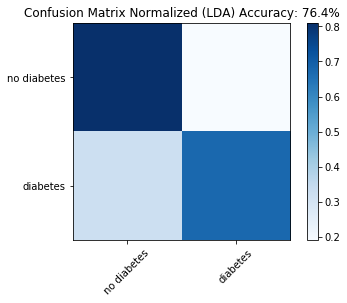

In [12]:
################ QDA ##################
# Train a QDA model on original features
qda = discriminant_analysis.QuadraticDiscriminantAnalysis().fit(X_train_scaled, y_train)

# Compute the predicted labels on test data
y_qda = qda.predict(X_test_scaled)

print("Acuracy of QDA : %.1f%%" % (metrics.accuracy_score(y_test,y_qda)*100))

compute_and_plot_cm(y_test, y_qda, data_class_labels, title="LDA")

### Two principle components: fit, predict, accuracy, confusion metrics

Acuracy of QDA + PCA: 68.1%
[[0.80357143 0.19642857]
 [0.55813953 0.44186047]]


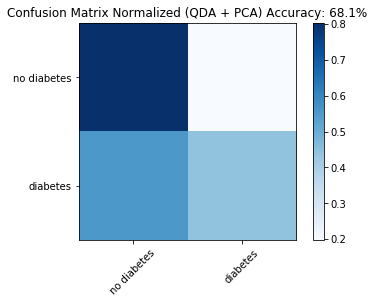

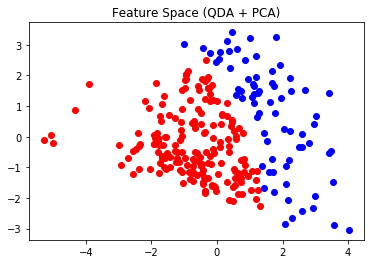

In [13]:
# Train a QDA model on pca extracted features
qda_pca = discriminant_analysis.QuadraticDiscriminantAnalysis().fit(X_train_scaled_pca, y_train)

# Compute the predicted labels on test data
y_qda_pca = qda_pca.predict(X_test_scaled_pca)

print("Acuracy of QDA + PCA: %.1f%%" % (metrics.accuracy_score(y_test,y_qda_pca)*100))

compute_and_plot_cm(y_test, y_qda_pca, data_class_labels, title="QDA + PCA")

plot_2d(X_test_scaled_pca, y_qda_pca, data_class_labels, title="QDA + PCA")

# 5. ELDA
### Expanded bases of original feature: preprocessing.PolynomialFeatures(degree=k).fit()

In [14]:
################ Polynomial expanded features ##################
# Train a polynomial expansion on original features
poly2 = preprocessing.PolynomialFeatures(degree=2).fit(X_train_scaled_pca)

# ... and apply it to the features
X_train_scaled_poly2 = poly2.transform(X_train_scaled_pca)
X_test_scaled_poly2 = poly2.transform(X_test_scaled_pca)

### Fitting LDA on the expanded features: discriminant_analysis.linearDiscriminantAnalysis().fit()

[[0.86309524 0.13690476]
 [0.58139535 0.41860465]]


C:\WinPython\python-3.7.0b3.amd64\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


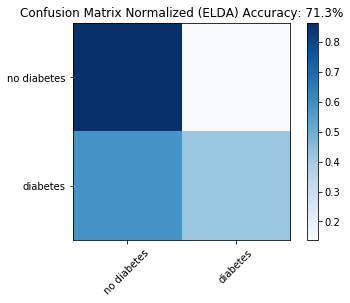

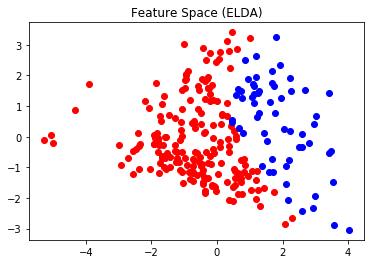

In [15]:
################  LDA on expanded ##################
# Train an LDA model on the original expanded features
lda_poly2 = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train_scaled_poly2, y_train)

# Compute the predicted labels on test data
y_lda_poly2= lda_poly2.predict(X_test_scaled_poly2)


compute_and_plot_cm(y_test, y_lda_poly2, data_class_labels, title="ELDA")

plot_2d(X_test_scaled_pca, y_lda_poly2, data_class_labels, title="ELDA")

# 6. QDA: svm.SVC().fit()

Acuracy of SVM : 75.2%
[[0.8452381  0.1547619 ]
 [0.43023256 0.56976744]]
Acuracy of SVM +PCA: 70.5%
[[0.85714286 0.14285714]
 [0.59302326 0.40697674]]


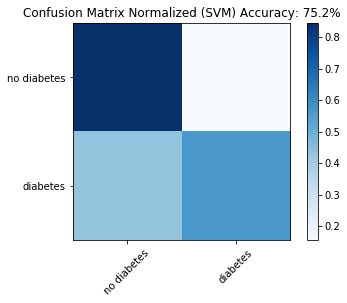

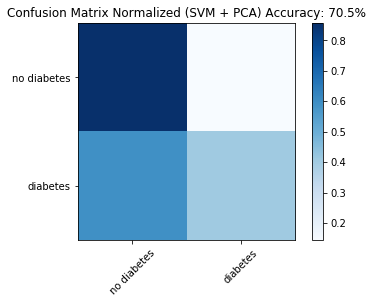

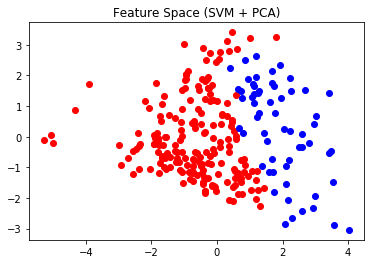

In [16]:
################ SVM ##################
# Train a SVM model on the original features
sv = svm.SVC().fit(X_train_scaled, y_train)

# Compute the predicted labels on test data
y_sv = sv.predict(X_test_scaled)
print("Acuracy of SVM : %.1f%%" % (metrics.accuracy_score(y_test,y_sv)*100))

# Show confusion matrix
compute_and_plot_cm(y_test, y_sv, data_class_labels, title="SVM")

# Train a SVM model on PCA extracted features
sv_pca = svm.SVC().fit(X_train_scaled_pca, y_train)

# Compute the predicted labels on test data
y_sv_pca = sv_pca.predict(X_test_scaled_pca)
print("Acuracy of SVM +PCA: %.1f%%" % (metrics.accuracy_score(y_test,y_sv_pca)*100))

# Show confusion matrix
compute_and_plot_cm(y_test, y_sv_pca, data_class_labels, title="SVM + PCA")

# Show data in 2D
plot_2d(X_test_scaled_pca, y_sv_pca, data_class_labels, title="SVM + PCA")\



# 7. Decision Tree: tree.DecisionTreeClassifier(max_depth=k).fit()


Acuracy of DecisionTree: 75.6%
[[0.86309524 0.13690476]
 [0.45348837 0.54651163]]
Acuracy of DecisionTree +PCA: 65.4%
[[0.82738095 0.17261905]
 [0.68604651 0.31395349]]


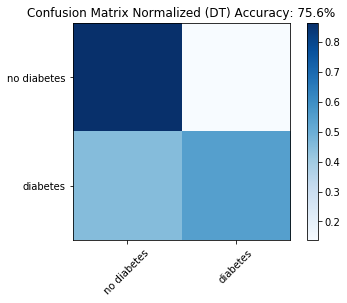

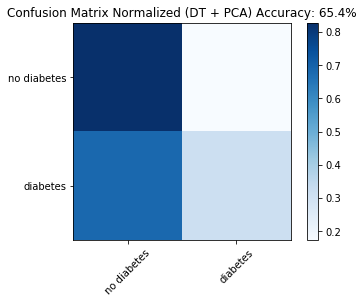

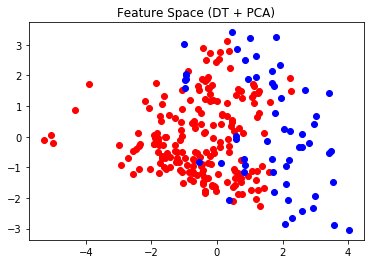

In [17]:
################ DecisionTree ##################
# Train a DT model on the original features
dt = tree.DecisionTreeClassifier(max_depth=5).fit(X_train_scaled, y_train)

# Compute the predicted labels on test data
y_dt = dt.predict(X_test_scaled)
print("Acuracy of DecisionTree: %.1f%%" % (metrics.accuracy_score(y_test,y_dt)*100))

# Show confusion matrix
compute_and_plot_cm(y_test, y_dt, data_class_labels, title="DT")

# Train a DT model on PCA extracted features
dt_pca = tree.DecisionTreeClassifier(max_depth=5).fit(X_train_scaled_pca, y_train)


# Compute the predicted labels on test data
y_dt_pca = dt_pca.predict(X_test_scaled_pca)

print("Acuracy of DecisionTree +PCA: %.1f%%" % (metrics.accuracy_score(y_test,y_dt_pca)*100))

# Show confusion matrix
compute_and_plot_cm(y_test, y_dt_pca, data_class_labels, title="DT + PCA")

# Show data in 2D
plot_2d(X_test_scaled_pca, y_dt_pca, data_class_labels, title="DT + PCA")




In [18]:
# 8. Random Forest:  ensemble.RandomForestClassifier.fit()

Acuracy of Random Forest: 74.4%
[[0.82142857 0.17857143]
 [0.40697674 0.59302326]]
Acuracy of Random Forest+PCA: 66.5%
[[0.80357143 0.19642857]
 [0.60465116 0.39534884]]


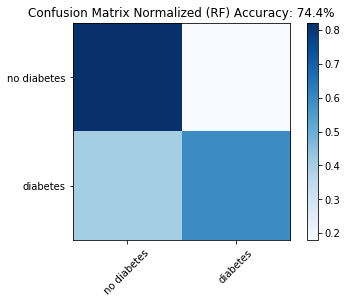

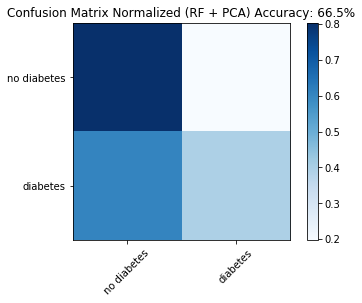

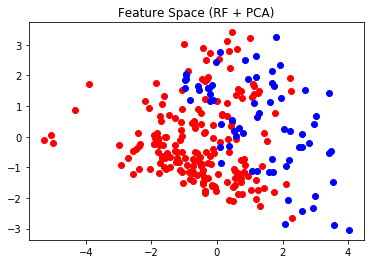

In [19]:
################ RandomForest ##################
# Train a RF model on the original features
rf = ensemble.RandomForestClassifier().fit(X_train_scaled, y_train)

# Compute the predicted labels on test data
y_rf = rf.predict(X_test_scaled)
print("Acuracy of Random Forest: %.1f%%" % (metrics.accuracy_score(y_test,y_rf)*100))

# Show confusion matrix
compute_and_plot_cm(y_test, y_rf, data_class_labels, title="RF")

# Train a Logit model on PDA extracted features
rf_pca = ensemble.RandomForestClassifier().fit(X_train_scaled_pca, y_train)

# Compute the predicted labels on test data
y_rf_pca = rf_pca.predict(X_test_scaled_pca)
print("Acuracy of Random Forest+PCA: %.1f%%" % (metrics.accuracy_score(y_test,y_rf_pca)*100))

# Show confusion matrix
compute_and_plot_cm(y_test, y_rf_pca, data_class_labels, title="RF + PCA")

# Show data in 2D
plot_2d(X_test_scaled_pca, y_rf_pca, data_class_labels, title="RF + PCA")